In [1]:
# Import library yang diperlukan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.datasets import load_wine
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load Dataset
wine = load_wine()


In [3]:
# Masukan dataset ke dalam dataframe
X, y = wine.data, wine.target
data = pd.DataFrame(data=np.c_[X, y], columns=wine.feature_names + ['target'])

In [4]:
# Menampilkan nama kolom (features atau variabel)
print(data.columns)

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')


In [5]:
# Informasi umum tentang dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [6]:
# cek missing value
data.isnull().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


In [7]:
# mencari data yang duplikasi
data.duplicated().sum()

0

In [8]:
# Menampilkan statistik deskriptif

print(data.describe())

          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

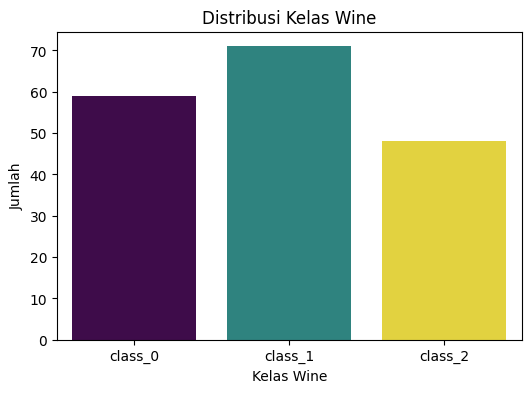

In [9]:
# Distribusi target
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=data, hue='target', palette='viridis', legend=False)
plt.title('Distribusi Kelas Wine')
plt.xlabel('Kelas Wine')
plt.ylabel('Jumlah')
plt.xticks(ticks=[0, 1, 2], labels=wine.target_names)
plt.show()

In [12]:
distribusi_target = data['target'].value_counts()
fig_target = px.bar(distribusi_target,
                   x=distribusi_target.index,
                   y=distribusi_target.values,
                   title='Distribusi Target Kelas Wine',
                   labels={'x': 'Target', 'y': 'Jumlah Target'},  # Menambahkan label pada sumbu
                   color=distribusi_target.index,  # Warna batang berdasarkan kelas
                   color_discrete_sequence=px.colors.sequential.Viridis)
fig_target.show()

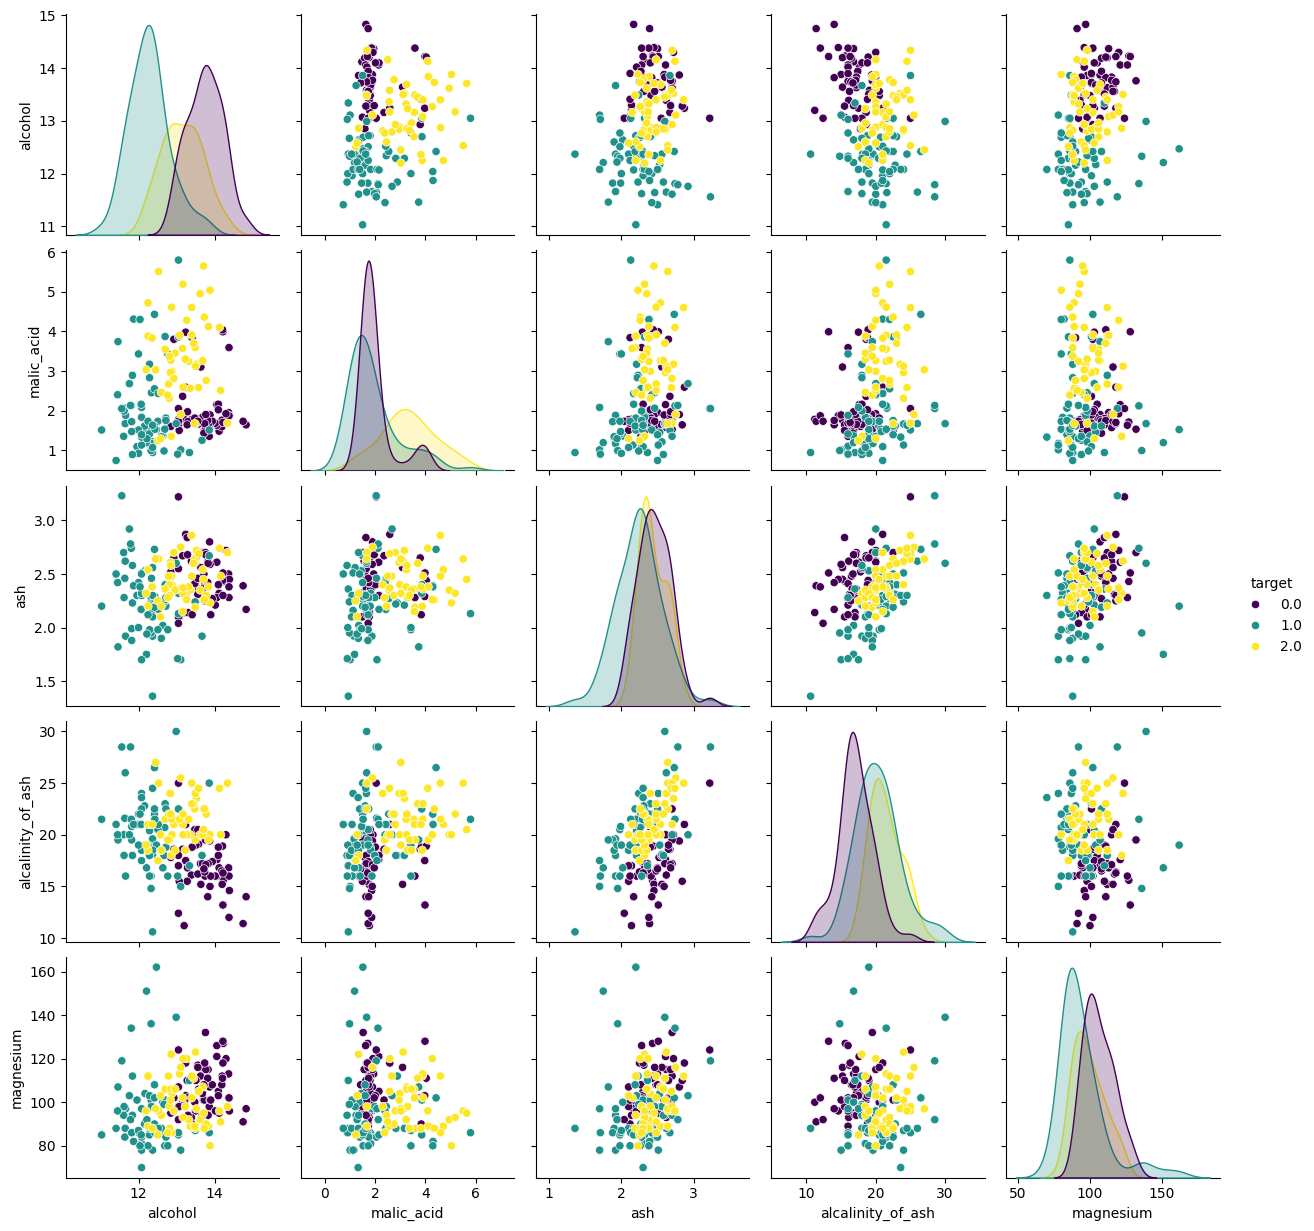

In [ ]:
# Pairplot untuk melihat distribusi antar fitur
subset_features1 = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium']
sns.pairplot(data[subset_features1 + ['target']], hue='target', palette='viridis', diag_kind='kde')
plt.show()

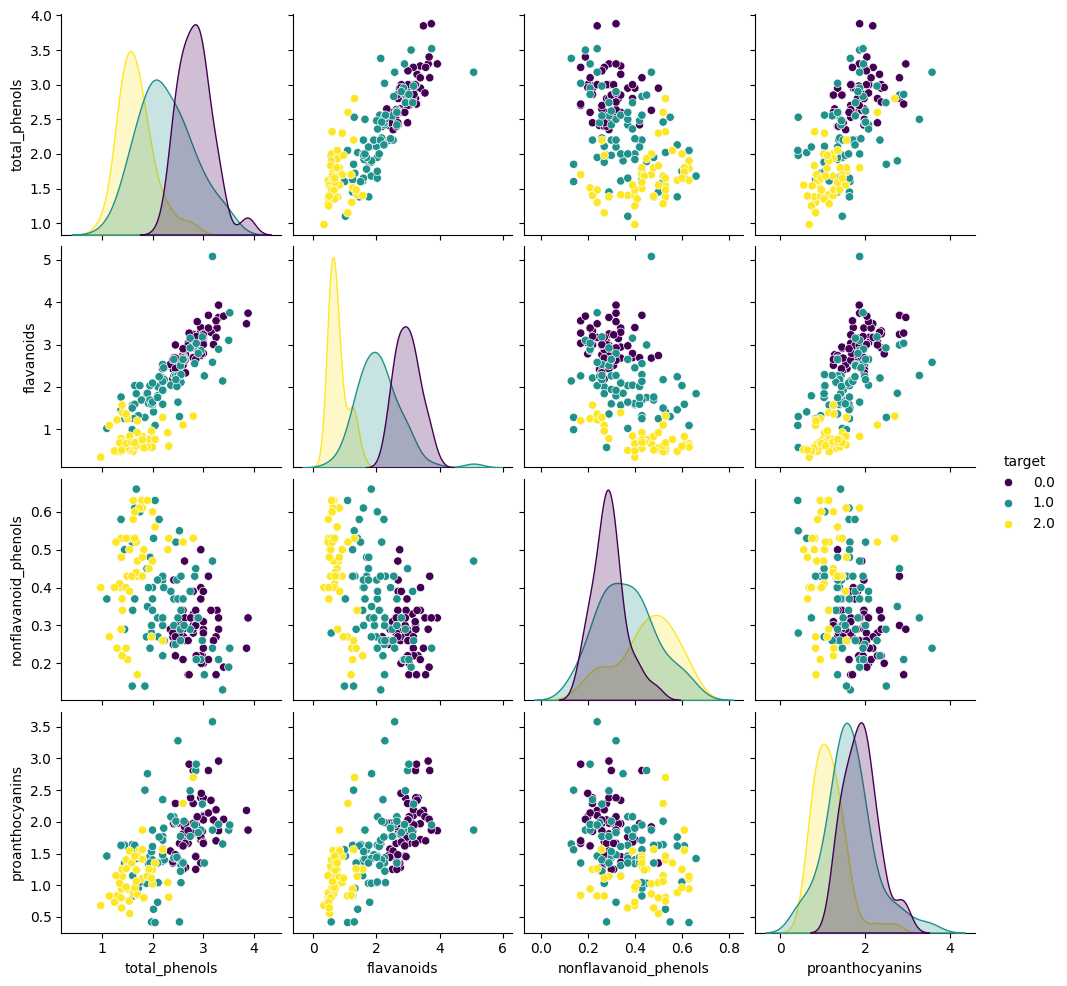

In [ ]:
# Pairplot untuk melihat distribusi antar fitur
subset_features2 = ['total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins']
sns.pairplot(data[subset_features2 + ['target']], hue='target', palette='viridis', diag_kind='kde')
plt.show()

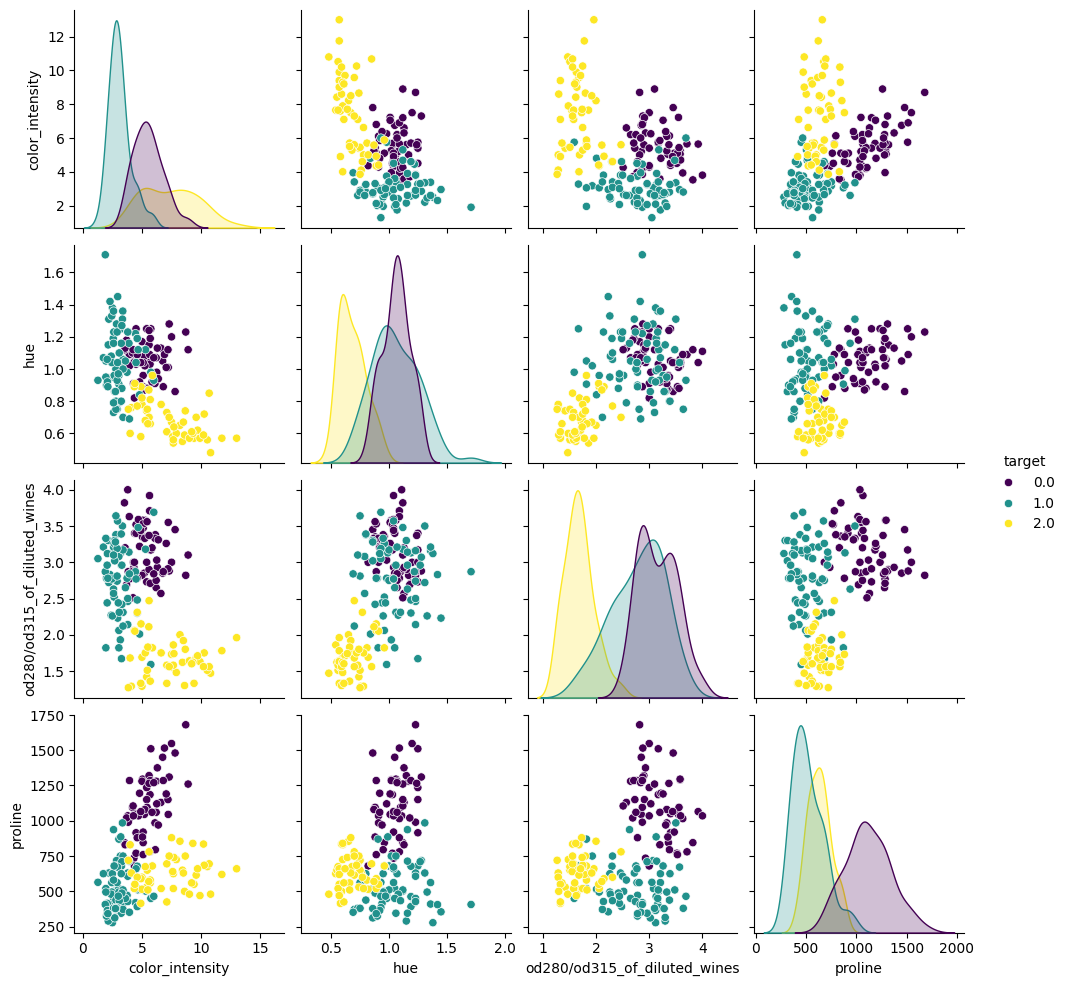

In [ ]:
# Pairplot untuk melihat distribusi antar fitur
subset_features3 = ['color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
sns.pairplot(data[subset_features3 + ['target']], hue='target', palette='viridis', diag_kind='kde')
plt.show()

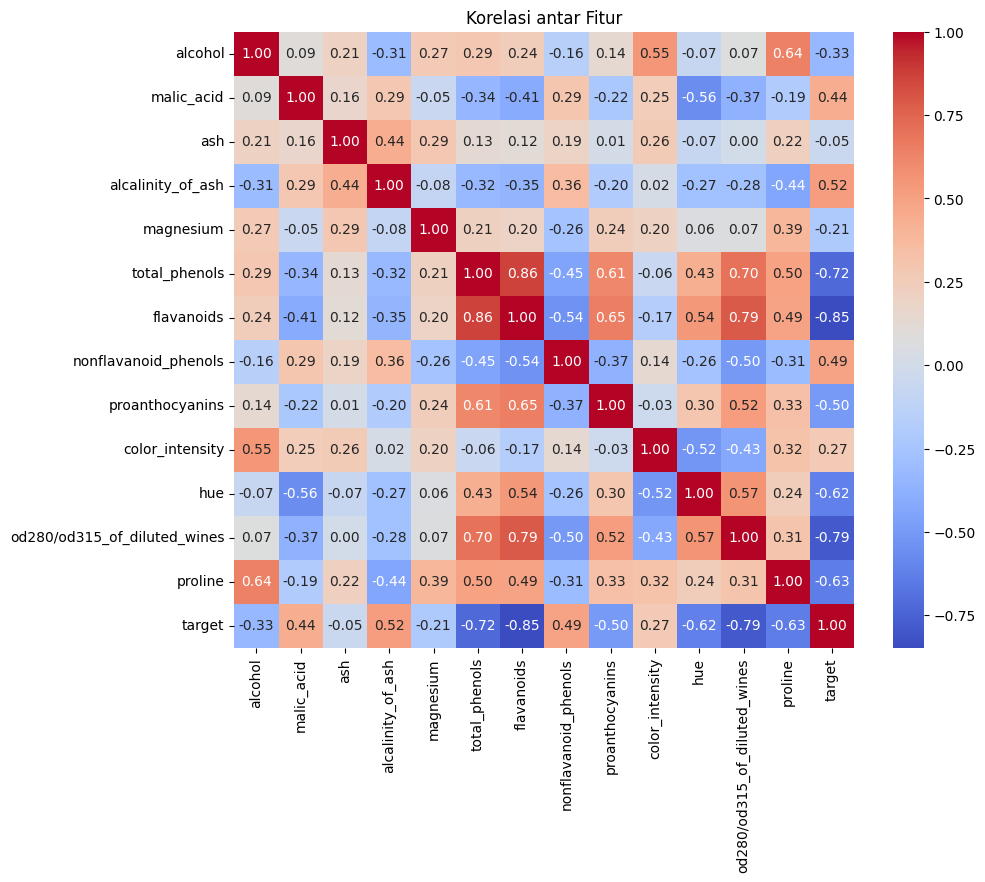

In [ ]:
# Korealasi fitur dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi antar Fitur')
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Skalakan value fitur menggunakan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Pisahkan data menjadi set pelatihan (training) dan pengujian (testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [15]:
# Menampilkan ukuran dataset
print("Training features shape:", X_train.shape)
print("Validation features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Validation target shape:", y_test.shape)

Training features shape: (142, 13)
Validation features shape: (36, 13)
Training target shape: (142,)
Validation target shape: (36,)


In [16]:
# Inisialisasi model dengan algoritma Random Forest
model = RandomForestClassifier(random_state=42)

In [17]:
# training model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
y_pred = model.predict(X_test)
print(y_pred)

[0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]


Accuracy of Decision Tree: 1.00


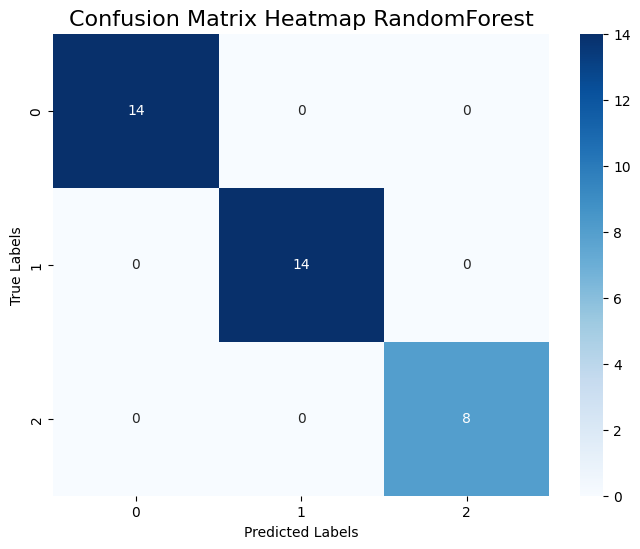

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluasi model Random Forest
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Decision Tree: {accuracy:.2f}')

plt.figure(figsize=(8, 6))
confusion_matrix = sns.heatmap(tf.math.confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
confusion_matrix.set_title('Confusion Matrix Heatmap RandomForest', fontsize=16)
confusion_matrix.set_xlabel('Predicted Labels')
confusion_matrix.set_ylabel('True Labels')
plt.show()


report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

<ipython-input-30-907616be5973>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances['Importance'],


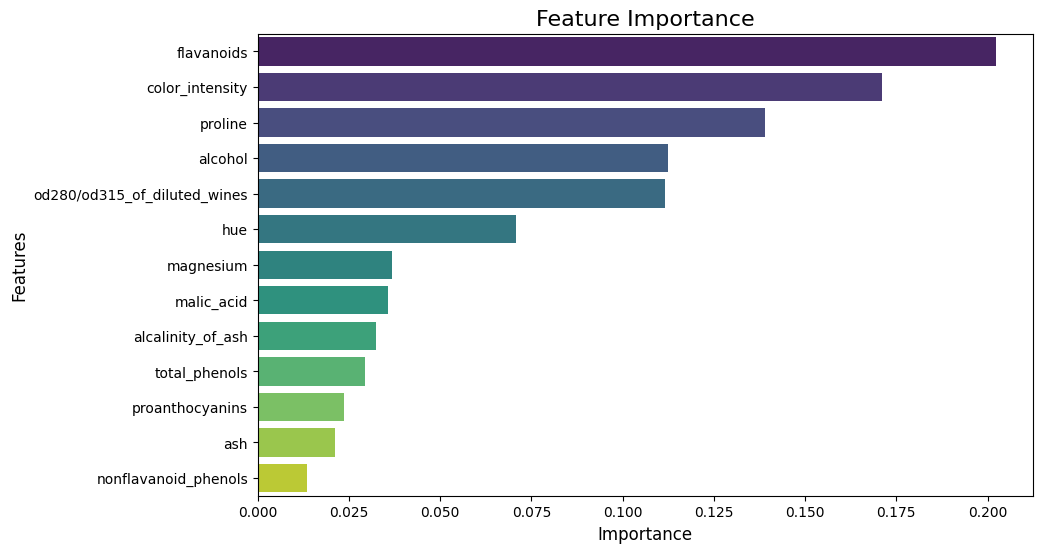

In [ ]:
# Analisis Fitur Penting
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index=wine.feature_names,
                                   columns=['Importance']).sort_values(by='Importance', ascending=False)

# Visualisasi menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances['Importance'],
            y=feature_importances.index,
            palette='viridis')
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()